In [130]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob

%load_ext tensorboard
import tensorboard #to use tensorboard on CSCSP

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [131]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(predictions_array)))
    
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## DATA VISUALIZATION

SHAPE : (779, 240, 240, 3)
SHAPE : (295, 240, 240, 3)
SHAPE : (293, 240, 240, 3)
SHAPE X DATASET: (1367, 240, 240, 3)
SHAPE Y DATASET: (1367,)
[0 0 0 ... 2 2 2]
JPEG
(240, 240)
RGB
Example of Normal Image


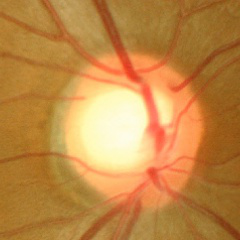

Example of Papilledema Image


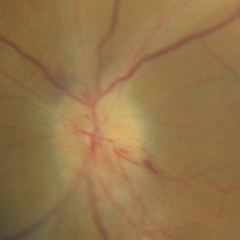

Example of Pseudopapilledema Image


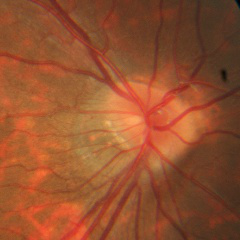

Number of Normal Images: 779
Shape Images Normal: (779, 240, 240, 3)
Shape of Train X: (956, 240, 240, 3)
Shape of Train Y: (956,)
Shape of Test X: (411, 240, 240, 3)
Shape of Test Y: (411,)


In [132]:
img_height, img_width = 240, 240

path_images_normal = 'archive/Normal/'
path_images_pap = 'archive/Papilledema/'
path_images_pseud = 'archive/Pseudopapilledema/'

path_image_example = '1.jpg'

array_normal_images =[]
array_pap_images =[]
array_pseud_images =[]
sizes= []
for i in glob.glob(path_images_pap+'*.jpg'):
    if(np.asarray(Image.open(i)).shape == (240, 240, 3)):
        array_pap_images.append(np.asarray(Image.open(i)))
        
array_pap_images = np.array(array_pap_images)


for j in glob.glob(path_images_pseud+'*.jpg'):
    array_pseud_images.append(np.array(Image.open(j)))
array_pseud_images = np.array(array_pseud_images)

for k in glob.glob(path_images_normal+'*.jpg'):
    array_normal_images.append(np.array(Image.open(k)))
array_normal_images = np.array(array_normal_images)





for i in [array_normal_images, array_pseud_images, array_pap_images]:
    print(f"SHAPE : {i.shape}")
    

X_dataset = np.concatenate((array_normal_images, array_pap_images, array_pseud_images))
print(f"SHAPE X DATASET: {X_dataset.shape}")
Y_dataset = np.concatenate((np.full(779, 0), np.full(295, 1), np.full(293, 2)))
print(f"SHAPE Y DATASET: {Y_dataset.shape}")
print(Y_dataset)

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.30, random_state=42)

image = Image.open(path_images_normal +path_image_example)
print(image.format)
print(image.size)
print(image.mode)
print("Example of Normal Image")
display(image)
image = Image.open(path_images_pap +path_image_example)
print("Example of Papilledema Image")
display(image)
image = Image.open(path_images_pseud +path_image_example)
print("Example of Pseudopapilledema Image")
display(image)
print(f"Number of Normal Images: {len(array_normal_images)}")
print(f"Shape Images Normal: {array_normal_images.shape}")

names= ["Train X", "Train Y", "Test X", "Test Y"]
array_samples = [X_train, y_train, X_test, y_test]
for i,j in (zip(names, array_samples)):
    print("Shape of "+str(i)+": "+ str(j.shape))
del names, array_samples




## MODEL Convolutional + Dense NN


In [133]:
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 120, 120, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)      

## Training

In [134]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))



Epoch 1/10


2022-07-26 08:42:18.287889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.9728 - accuracy: 0.6203

2022-07-26 08:42:22.477178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 5s 156ms/step - loss: 0.9728 - accuracy: 0.6203 - val_loss: 0.5844 - val_accuracy: 0.7664
Epoch 2/10
30/30 [==============================] - 4s 145ms/step - loss: 0.5159 - accuracy: 0.8222 - val_loss: 0.4139 - val_accuracy: 0.8273
Epoch 3/10
30/30 [==============================] - 4s 140ms/step - loss: 0.4253 - accuracy: 0.8400 - val_loss: 0.3866 - val_accuracy: 0.8418
Epoch 4/10
30/30 [==============================] - 4s 142ms/step - loss: 0.4049 - accuracy: 0.8483 - val_loss: 0.3768 - val_accuracy: 0.8516
Epoch 5/10
30/30 [==============================] - 4s 141ms/step - loss: 0.3313 - accuracy: 0.8713 - val_loss: 0.3913 - val_accuracy: 0.8467
Epoch 6/10
30/30 [==============================] - 4s 144ms/step - loss: 0.2867 - accuracy: 0.8912 - val_loss: 0.3378 - val_accuracy: 0.8686
Epoch 7/10
30/30 [==============================] - 4s 142ms/step - loss: 0.2291 - accuracy: 0.9079 - val_loss: 0.4108 - val_accuracy: 0.8686
Epoch 8/10
30/30 

## Evaluation

13/13 - 1s - loss: 0.2982 - accuracy: 0.8881 - 576ms/epoch - 44ms/step


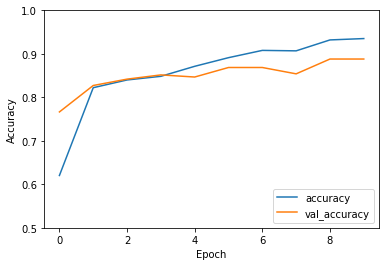

In [135]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

### Adding Softmax

In [136]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

### TESTING 


(240, 240)


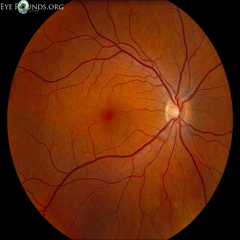

1/1 [==============================] - 0s 62ms/step
[[7.5533336e-07 9.9999523e-01 3.9937941e-06]]


2022-07-26 08:43:02.238618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


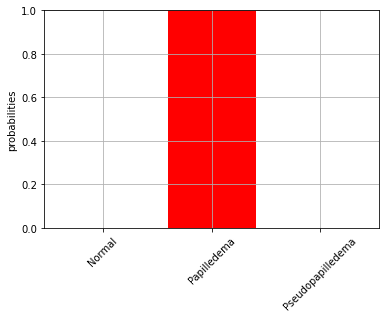

In [137]:

#Papilledema_test
img = Image.open("Normal-fundus-LRG.jpg")

img=img.resize((240, 240) )
print(img.size)
display(img)

img = np.array(img)
img = img.reshape(1, 240, 240, 3)

predictions_single = probability_model.predict(img)
print(predictions_single)


class_names = ["Normal", "Papilledema", "Pseudopapilledema"]
test_labels = []
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(3), class_names, rotation=45)
plt.grid()
plt.ylabel("probabilities")
plt.show()


